#Goal:
To predict the entire birth chart given some houses.

#Hypothesis:
Planets with low mutual information will yield bad r2 scores and planets with high mutual information will yield good r2 scores.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("WXML_WI24_TrainingDataFrame")
pd.to_datetime(df["Datetime"])
df.head()

,Datetime,Sun House,Moon House,Mercury House,Venus House,Mars House,Jupiter House,Saturn House,Uranus House,Neptune House
0,2000-01-01 00:00:00,4,1,3,2,5,7,8,5,4
1,2000-01-01 02:00:00,3,12,2,1,4,6,7,4,3
2,2000-01-01 04:00:00,2,11,1,12,3,5,6,3,2
3,2000-01-01 06:00:00,1,10,12,11,2,4,5,2,2
4,2000-01-01 08:00:00,12,9,11,10,1,3,4,1,1


In [ ]:
X = df.drop(columns = "Datetime").drop(columns = "Neptune House")
X.head()

,Sun House,Moon House,Mercury House,Venus House,Mars House,Jupiter House,Saturn House,Uranus House
0,4,1,3,2,5,7,8,5
1,3,12,2,1,4,6,7,4
2,2,11,1,12,3,5,6,3
3,1,10,12,11,2,4,5,2
4,12,9,11,10,1,3,4,1


In [ ]:
y = df["Neptune House"]
y.head()

0    4
1    3
2    2
3    2
4    1
Name: Neptune House, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Multivariate Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
c = lr.intercept_
c

2.250846724465836

In [ ]:
m = lr.coef_
m

array([ 0.03349409,  0.00167883, -0.02531539,  0.07099961, -0.08402262,
       -0.04964809, -0.06943723,  0.77134063])

In [ ]:
y_pred_train = lr.predict(X_train)
r2_score(y_train, y_pred_train)

0.6719179601371853

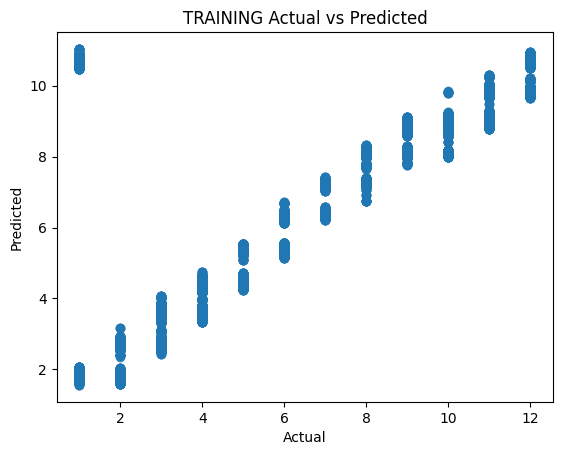

In [ ]:
plt.scatter(y_train, y_pred_train, alpha = 0.5)
plt.title("TRAINING Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
y_pred_test = lr.predict(X_test)
r2_score(y_test, y_pred_test)

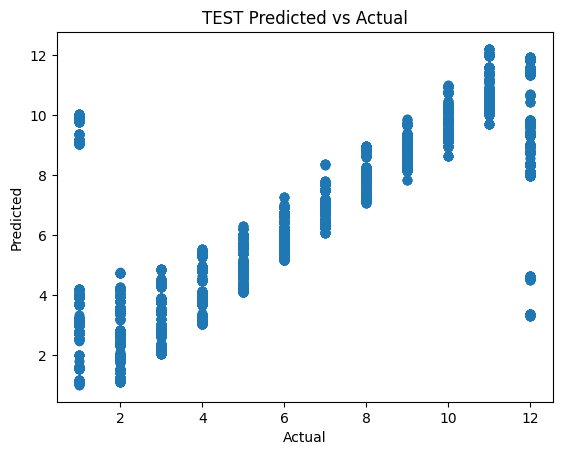

In [ ]:
plt.scatter(y_test, y_pred_test)
plt.title("TEST Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

#Thoughts/Comments/Feelings:

PLANET: TRAIN/TEST

**SUN: 0.7145698630274568, 0.7143605864837757**

**MERCURY: 0.7151100014386629, 0.7144646561197907**

VENUS: 0.48732105565162087, 0.491689389684249

MOON: 0.003518162994572971, 0.004035401085470736

MARS: 0.46731425727807885, 0.45481595696738175

**JUPITER: 0.8057967494581142, 0.7950771236838861**

**SATURN: 0.8005533661026405, 0.7882689673194757**

URANUS: 0.6531599216541356, 0.6481947520760778

NEPTUNE: 0.6719179601371853, 0.6656787350772795

Clearly, planets with high mutual information lend themselves best to linear regression models. I think it makes sense that the planets with low mutual information are still hard to predict.

In the case of using the planets to find the dates, intially I thought the model would use some version of VAR or perhaps SVM (???). However, when I graphed the data, I saw that it was sinusoidal (because it moves through all the houses) and had a really low time period. I wasn't sure what to do past that because I couldn't find a smart way to rescale the data or compress it without losing a lot of information. I think an idea that might work would be to approximate the waves using the taylor series but I don't really know how to implement that.

Also, I'm not entirely sure pruning the database to a smaller set of dates as we add more information would work unless we restrict the database to a certain range of dates.